# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import openweathermapy.core as owm
import numpy as np
import json
import datetime as dt

# Import API key
import api_keys
owm_key = api_keys.api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes (i.e. the world!)
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Changed the number to see if the trends I'm seeing are true to a larger degree or if it was sampling bias. 
lats = np.random.uniform(low=-90.000, high=90.000, size=3000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=3000)
# Fun lil function to combine the latitude and longitude data. Neat!
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

981

In [3]:
# I'm guessing this is NOT how the example was done.
# But this makes sense to me. 
# I'm just making the list of cities into their own dataframe, then adding the columns that I want. 
# The columns will be blank and will be added to with every API call. 
cities = pd.DataFrame(cities)
cities.columns = ["city"]
cities["cloudiness"] = ""
cities["country"] = ""
cities["date"] = ""
cities["humidity"] = ""
cities["latitude"] = ""
cities["longitude"] = ""
cities["max temp"] = ""
cities["wind speed"] = ""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Here's the fun part!

# Set the params which will be used for all the API calls
settings = {"units": "imperial", "appid": owm_key}

# Get the print out started.
print("Beginning Data Retrieval\n________________________")

# Get a date for when this data is pulled.
date = dt.datetime.today().strftime("%m/%d/%Y")

# Start the for-loop!
# Apparently some of the actual cities are not tracked by OWM, so we have no data for them.
# We have to add in an exception, otherwise it crashes and I cry. 
for i in range(0, len(cities)):
    try:
        weather = owm.get_current(cities.city[i], **settings)
        print(f'Processing record {i+1} of {len(cities)}| {cities.city[i]}')
        cities.cloudiness[i] = weather["clouds"]["all"]
        cities.country[i] = weather["sys"]["country"]
        cities.date[i] = weather["dt"]
        cities.humidity[i] = weather["main"]["humidity"]
        cities.latitude[i] = weather["coord"]["lat"]
        cities.longitude[i] = weather["coord"]["lon"]
        cities["max temp"][i] = weather["main"]["temp_max"]
        cities["wind speed"][i] = weather["wind"]["speed"] 
    except:
        print(f"Cannot find {cities.city[i]} in OWM")
        cities.cloudiness[i] = "NA"    

Beginning Data Retrieval
________________________
Processing record 1 of 981| beringovskiy
Processing record 2 of 981| rikitea
Processing record 3 of 981| busselton
Processing record 4 of 981| albany
Processing record 5 of 981| kodiak
Processing record 6 of 981| lagos
Processing record 7 of 981| sinnamary
Processing record 8 of 981| bluff
Processing record 9 of 981| cape town
Processing record 10 of 981| ushuaia
Cannot find barentsburg in OWM
Processing record 12 of 981| tessalit
Processing record 13 of 981| adrar
Processing record 14 of 981| jamestown
Processing record 15 of 981| hithadhoo
Processing record 16 of 981| avera
Processing record 17 of 981| bam
Processing record 18 of 981| sitka
Processing record 19 of 981| mahina
Processing record 20 of 981| tuatapere
Processing record 21 of 981| bredasdorp
Processing record 22 of 981| hobart
Processing record 23 of 981| ancud
Processing record 24 of 981| rodrigues alves
Processing record 25 of 981| punta arenas
Processing record 26 of 98

Processing record 219 of 981| caravelas
Cannot find el wasta in OWM
Processing record 221 of 981| noumea
Processing record 222 of 981| san quintin
Processing record 223 of 981| inta
Processing record 224 of 981| chokurdakh
Processing record 225 of 981| maibong
Processing record 226 of 981| port elizabeth
Cannot find akyab in OWM
Processing record 228 of 981| honiara
Processing record 229 of 981| barabai
Processing record 230 of 981| borogontsy
Processing record 231 of 981| grand-santi
Processing record 232 of 981| carnarvon
Processing record 233 of 981| zilair
Processing record 234 of 981| casper
Processing record 235 of 981| yulara
Processing record 236 of 981| san blas
Cannot find nizhneyansk in OWM
Processing record 238 of 981| port-gentil
Processing record 239 of 981| suntar
Processing record 240 of 981| nuuk
Processing record 241 of 981| tabuk
Processing record 242 of 981| touros
Processing record 243 of 981| ostrovnoy
Processing record 244 of 981| jodar
Processing record 245 of 9

Processing record 436 of 981| hirara
Processing record 437 of 981| ligayan
Processing record 438 of 981| itarema
Processing record 439 of 981| umm lajj
Processing record 440 of 981| loveland
Processing record 441 of 981| tura
Processing record 442 of 981| srednekolymsk
Processing record 443 of 981| moron
Processing record 444 of 981| vostok
Processing record 445 of 981| kiunga
Processing record 446 of 981| okitipupa
Processing record 447 of 981| eenhana
Cannot find sinkat in OWM
Processing record 449 of 981| trincomalee
Processing record 450 of 981| naron
Processing record 451 of 981| ostersund
Processing record 452 of 981| naryan-mar
Processing record 453 of 981| charters towers
Processing record 454 of 981| talnakh
Processing record 455 of 981| faya
Processing record 456 of 981| binzhou
Processing record 457 of 981| oyama
Processing record 458 of 981| laem sing
Processing record 459 of 981| wuwei
Processing record 460 of 981| xuddur
Processing record 461 of 981| abu kamal
Cannot find

Processing record 653 of 981| san rafael
Processing record 654 of 981| san juan
Processing record 655 of 981| walkerburn
Cannot find bokspits in OWM
Cannot find tungkang in OWM
Processing record 658 of 981| kruisfontein
Processing record 659 of 981| rocha
Processing record 660 of 981| rafraf
Processing record 661 of 981| huntsville
Processing record 662 of 981| tautira
Processing record 663 of 981| bambanglipuro
Processing record 664 of 981| popondetta
Processing record 665 of 981| haines junction
Processing record 666 of 981| sulangan
Processing record 667 of 981| rosarito
Processing record 668 of 981| visby
Processing record 669 of 981| bathsheba
Cannot find urdzhar in OWM
Processing record 671 of 981| sechura
Processing record 672 of 981| bhalwal
Processing record 673 of 981| freetown
Processing record 674 of 981| praia da vitoria
Cannot find labrea in OWM
Cannot find samalaeulu in OWM
Processing record 677 of 981| liman
Processing record 678 of 981| sorland
Processing record 679 of

Processing record 867 of 981| murakami
Processing record 868 of 981| valdivia
Cannot find mayari in OWM
Processing record 870 of 981| roald
Processing record 871 of 981| wewak
Processing record 872 of 981| togul
Processing record 873 of 981| vega de alatorre
Processing record 874 of 981| neya
Processing record 875 of 981| mizan teferi
Processing record 876 of 981| san fernando
Processing record 877 of 981| shingu
Cannot find maarianhamina in OWM
Processing record 879 of 981| bucerias
Processing record 880 of 981| dubbo
Processing record 881 of 981| germersheim
Cannot find berbera in OWM
Processing record 883 of 981| usinsk
Processing record 884 of 981| murray bridge
Processing record 885 of 981| perth
Processing record 886 of 981| shiraoi
Processing record 887 of 981| dodola
Processing record 888 of 981| baie-saint-paul
Processing record 889 of 981| solano
Processing record 890 of 981| paamiut
Cannot find araguacu in OWM
Processing record 892 of 981| okha
Processing record 893 of 981| 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Because I just added to my dataframe, I now need to get 
# rid of the rows for cities that are not in OWM. 
cities = cities.drop(cities[cities.cloudiness == "NA"].index)

# Reset the index cuz it was annoying me that it wasn't in order
cities = cities.reset_index(drop=True)

# Save this! You'll never have this exact dataset again!
cities.to_csv("CityWeather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

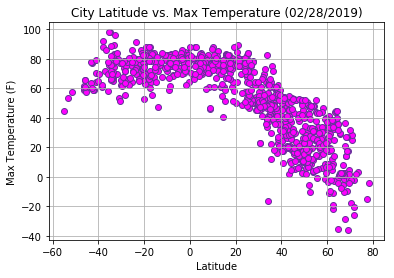

<Figure size 432x288 with 0 Axes>

In [6]:
# PLOT! Latitude versus temperature
# Added some colors because otherwise it's borning AF

plt.scatter(x = cities.latitude, y = cities["max temp"], edgecolor = "rebeccapurple", color = "fuchsia")
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("LatVTemp.png")

#### Latitude vs. Humidity Plot

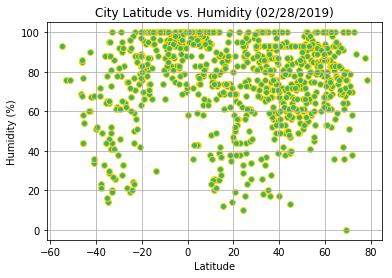

<Figure size 432x288 with 0 Axes>

In [7]:
# MORE plotting, this time Latitude vs Humidity.
plt.scatter(x = cities.latitude, y = cities.humidity, edgecolor = "gold", color = "mediumseagreen")
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("LatVHum.png")
# OH!? Apparently you can get a humidity that is above 100%! 
# It's called supersaturation.
# Smarter every. fricken. day.

#### Latitude vs. Cloudiness Plot

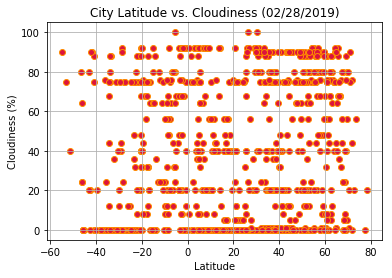

<Figure size 432x288 with 0 Axes>

In [8]:
# Still plotting: Latitude vs Cloudiness
plt.scatter(x = cities.latitude, y = cities.cloudiness, edgecolor = "darkorange", color = "crimson")
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("LatVCloud.png")

#### Latitude vs. Wind Speed Plot

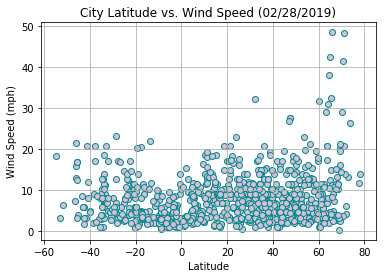

<Figure size 432x288 with 0 Axes>

In [9]:
# Final plot: Latitude vs Wind Speeds
plt.scatter(x = cities.latitude, y = cities["wind speed"], edgecolor = "darkcyan", color = "thistle")
plt.grid(which='major', axis='both')
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("LatVWind.png")

Three Observations!
1. Well. Depending on how you measure "good weather", I'm not sure if the idea of better weather holds up exactly. BUT the temperature definitely does have a strong trend towards warmer as you get closer to latitude = 0 (the equator). However, the temperatures on either side of the equator at the same latitude magnitude (i.e. -30 and +30) have have different temperatures. Latitudes that are above the equator seem to show a sharper decrease in temperature as you go away from the equator compared to latitudes below the equator. 
This is probably because of the tilt of the earth's axis.

2. There are probably more cities above the equator than below the equator, just judging by the clustering of more cities towards the right of all the graphs. This is most noticeable once we pass -40 and +40 latitudes. Above the equator, there are MANY cities above 40 and below the equator, there are not so many cities below -40. Sampling bias? probably not if you just think about the geography of the Earth. And you can run this program 1000 times and you'll probably not get many instances of a flip-flopped scenario.

3. Even with ~1000 datapoints there are no clear relationships between latitude and Wind Speed, Humidity, and Cloudiness. There MAY be a slight trend for higher humidity on average when you're between -20 and 0 degrees latitude, but I wouldn't bet my life on it. 
